# Kaggle-Minist

Use your knowledge learned from Machine Learn course teached by Andrew Ng to solver this digital number classification problem.

### Load data

load the training data and look at some images.

In [1]:
from data import load_train_data

images, labels = load_train_data('data/train.csv')

### Visualize some data

take some image from every label and show it.

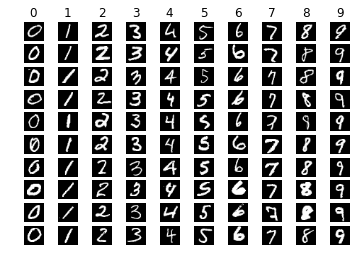

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

classes = [str(i) for i in range(10)]
num_classes = len(classes)
sample_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, sample_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(sample_per_class, num_classes, plt_idx)
        plt.imshow(images[idx].astype(np.uint8), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Train a Dummy Model

I have writed a dummy model, take a look at the code in `model.py`, and train the model below. It will also plot the mean image for every label.

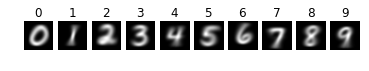

In [3]:
from model import DummyModel

dummy_model = DummyModel()
dummy_model.train(images, labels)

for i, w in enumerate(dummy_model.ws):
    plt.subplot(1, len(dummy_model.ws), i + 1)
    plt.imshow(w.astype(np.uint8), cmap='gray')
    plt.axis('off')
    plt.title(str(i))
plt.show()

we have train the dummy model. Now we can test the model on training data. To see the performace of the dummy model. `evaluate` function will evaluate the accuracy of every label. We can not evaluate the test data since they don't have any labels.

**Question** Actually, we don't really have a test data for this model. The test data I mention here is the data with label and is not used to train the model. test data from `test.csv` doesn't have label. How we handle this problem and can evaluate our model's generalization?

**You Answer**: fill in here

### Full pipeline

For the fully pipeline. see and run the code below.

In [4]:
import numpy as np
from data import load_train_data, evaluate
from model import DummyModel

# load train data
X, Y = load_train_data('data/train.csv')
# split train test data
train_ratio = 0.8
samples_n = len(X)
train_n = int(samples_n * train_ratio)
test_n = samples_n - train_n
# generate a random index list to split train and test
idx = np.random.permutation(samples_n)
train_X, train_Y = X[idx[:train_n]], Y[idx[:train_n]]
test_X, test_Y = X[idx[train_n:]], Y[idx[train_n:]]

# train the dummy model with train data
dummy_model = DummyModel()
dummy_model.train(train_X, train_Y)

print("===================================")  

# evaluate the train data
Y_predict = dummy_model.predict(train_X)
accs = evaluate(Y_predict, train_Y)
print('Accuracy on train data')
for i, acc in enumerate(accs):
    print('Acc for %d: %.2f%%'%(i, acc*100))
print('Mean Accuracy for train data: %.2f%%'%(accs.mean()*100))
print("===================================")

# evaluate the test data
Y_predict = dummy_model.predict(test_X)
accs = evaluate(Y_predict, test_Y)
print('Accuracy on test data')
for i, acc in enumerate(accs):
    print('Acc for %d: %.2f%%'%(i, acc*100))
print('Mean Accuracy for test data: %.2f%%'%(accs.mean()*100))
print("===================================")  

Accuracy on train data
Acc for 0: 87.06%
Acc for 1: 96.35%
Acc for 2: 76.16%
Acc for 3: 76.25%
Acc for 4: 81.79%
Acc for 5: 66.89%
Acc for 6: 86.44%
Acc for 7: 84.21%
Acc for 8: 74.33%
Acc for 9: 77.41%
Mean Accuracy for train data: 80.69%
Accuracy on test data
Acc for 0: 87.94%
Acc for 1: 96.98%
Acc for 2: 77.82%
Acc for 3: 76.64%
Acc for 4: 80.33%
Acc for 5: 69.41%
Acc for 6: 87.37%
Acc for 7: 82.31%
Acc for 8: 72.58%
Acc for 9: 77.05%
Mean Accuracy for test data: 80.84%


### Handle `test.csv`

use dummy model to generate labels for test data from `test.csv`. save the labels in csv file and submit the answer to kaggle to see the performance.

In [5]:
from data import load_test_data, save_answer

X = load_test_data('data/test.csv')
Y = dummy_model.predict(X)
save_answer(Y, 'data/submission.csv')

### Write your own model and follow the pipeline above to solve mnist

create your model in `model.py` like **DummyModel**. And use your model to train the data. Your model should perform better than the DummyModel I wrote. good luck.